<a href="https://colab.research.google.com/github/Tonkle-Time/SinxProject/blob/main/Ai_assisted_minimax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1547729391.py:31: RuntimeWarning: overflow encountered in scalar power
  A[i, j] = x[i]**j


Polynomial coefficients: [ 3.18035525e-016  1.00000000e+000 -5.71260895e-011 -1.66666665e-001
 -1.39311846e-008  8.33343382e-003 -4.85301336e-007 -1.96761578e-004
 -4.09388565e-006  1.02997842e-005 -1.04009297e-005  1.06273565e-005
 -7.89538521e-006  3.97602246e-006 -1.14204324e-006  5.19920498e-008
  5.96570711e-008  1.80410813e-009 -4.56033669e-009 -5.62718375e-009
  3.55573704e-009 -2.21431181e-010 -2.27920981e-010  3.47514781e-011
 -1.47325166e-011  1.08557392e-011  2.33652273e-013 -1.08383161e-012
  8.92007207e-015  2.45794244e-014  5.87785894e-015  5.89146013e-015
 -9.80318351e-016 -2.41528199e-016 -4.12953980e-016  1.12491741e-016
  3.14685395e-017 -1.51438354e-017  5.71886701e-018  1.24579221e-019
 -9.39235084e-019  1.36587223e-019 -2.41892950e-020  3.02754789e-021
  5.37050612e-021 -7.91666872e-022  6.36267245e-022 -3.66964989e-023
 -3.97405401e-023 -3.54599935e-023  4.55919442e-024  7.80585514e-025
  2.15662168e-025 -1.51686312e-026  2.15457551e-026  1.20656360e-026
 -2.03444

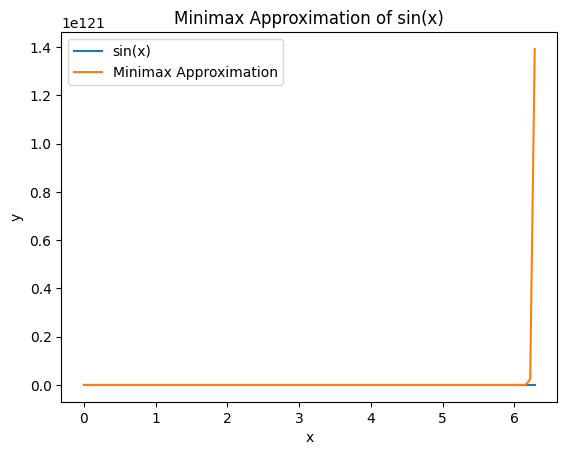

In [44]:
import numpy as np
import math
import matplotlib.pyplot as plt

def remez_minimax(func, n, interval, num_points=1000):
    """
    Implements the Remez (minimax interpolation) algorithm to find the best
    polynomial approximation.

    Args:
        func: The function to approximate (e.g., math.sin or np.sin).
        n: The degree of the approximating polynomial.
        interval: A tuple (a, b) representing the interval of approximation.
        num_points: The number of points to use for evaluating the error.

    Returns:
        A tuple containing the polynomial coefficients and the error.
    """
    a, b = interval
    # Initial guess for the n+2 extremal points (Chebyshev nodes)
    x = np.cos(np.linspace(0, np.pi, n + 2))
    x = 0.5 * (b - a) * x + 0.5 * (a + b)

    for _ in range(100):  # Limit iterations to prevent infinite loops
        # Build the system of linear equations
        A = np.zeros((n + 2, n + 2))
        B = np.zeros(n + 2)

        for i in range(n + 2):
            for j in range(n + 1):
                A[i, j] = x[i]**j
            A[i, n + 1] = (-1)**i
            # Use the provided function, assuming it can handle scalar input
            B[i] = func(x[i])

        # Solve for polynomial coefficients and error (c_0, ..., c_n, E)
        try:
            coeffs_and_error = np.linalg.solve(A, B)
        except np.linalg.LinAlgError:
            print("Warning: Could not solve linear system. Possible issues with chosen points or function.")
            break

        coeffs = coeffs_and_error[:-1]
        error = coeffs_and_error[-1]

        # Find the new extremal points
        p = np.poly1d(coeffs[::-1])  # Construct polynomial
        # Use np.linspace for evaluation over the interval
        eval_points = np.linspace(a, b, num_points)
        # Ensure the function can handle array input for error evaluation
        try:
            error_values = func(eval_points) - p(eval_points)
        except TypeError:
             print("Warning: The provided function does not support array input for error evaluation. Using a loop.")
             error_values = np.array([func(pt) - p(pt) for pt in eval_points])


        new_x_indices = np.argsort(np.abs(error_values))[-n - 2:]
        new_x = eval_points[new_x_indices]
        new_x = np.sort(new_x)

        # Check for convergence
        if np.max(np.abs(new_x - x)) < 1e-9:
            break
        x = new_x

    return coeffs, error

# Example usage for sin(x)
n = 400
interval = (0, math.pi*2 )
# Use np.sin which handles array input
coeffs, error = remez_minimax(np.sin, n, interval)

print("Polynomial coefficients:", coeffs)
print("Error:", error)

# Verify the approximation
x_test = np.linspace(0, math.pi *2, 100)
y_sin = np.sin(x_test)
p = np.poly1d(coeffs[::-1])
y_approx = p(x_test)

plt.plot(x_test, y_sin, label='sin(x)')
plt.plot(x_test, y_approx, label='Minimax Approximation')
plt.legend()
plt.title('Minimax Approximation of sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()